In [21]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, roc_auc_score, recall_score
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid')


In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\athar\Documents\Coding\AI\Projects\Data\energy_efficiency_data.csv')

# Display the first five rows
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Data types and non-null counts
df.info()

Dataset contains 768 rows and 10 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
# Statistical summary
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [5]:
# Check for missing values
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

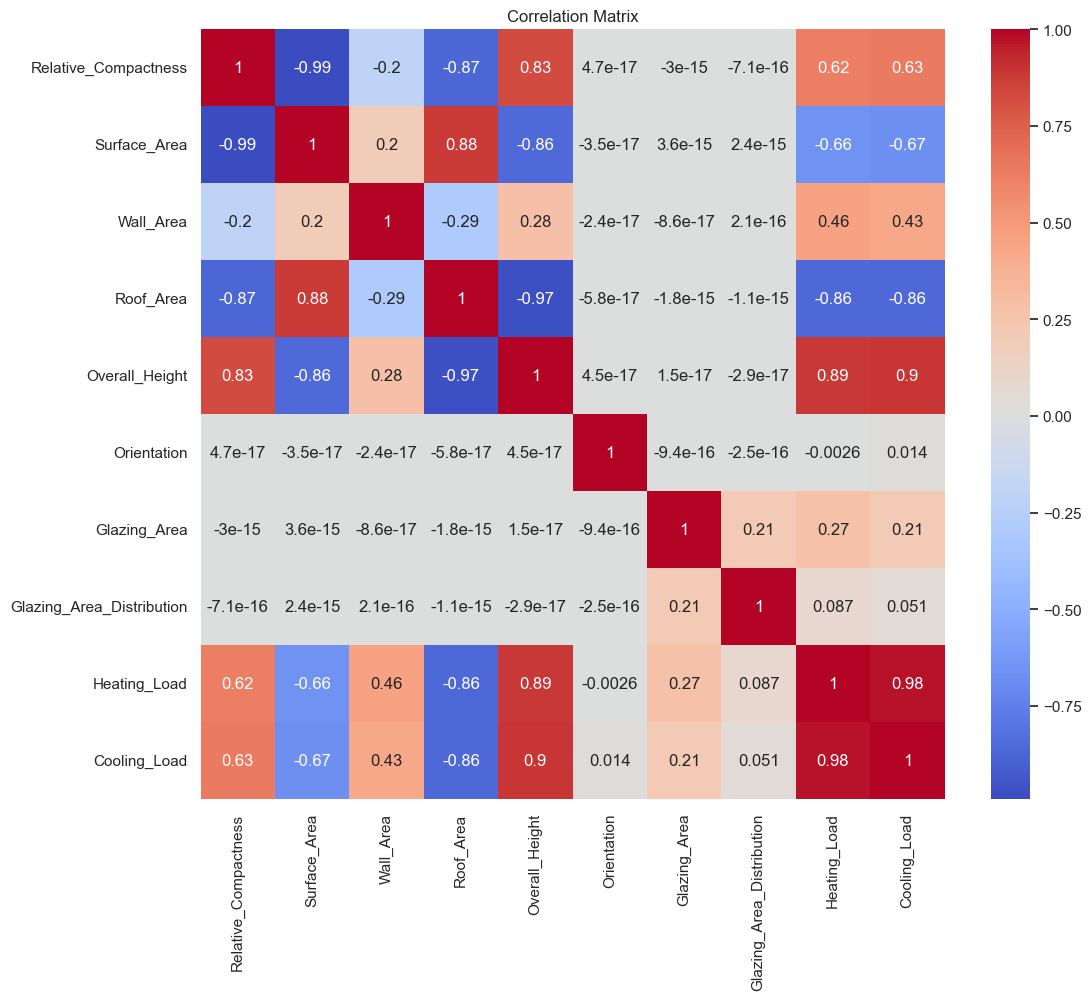

In [6]:
# Correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

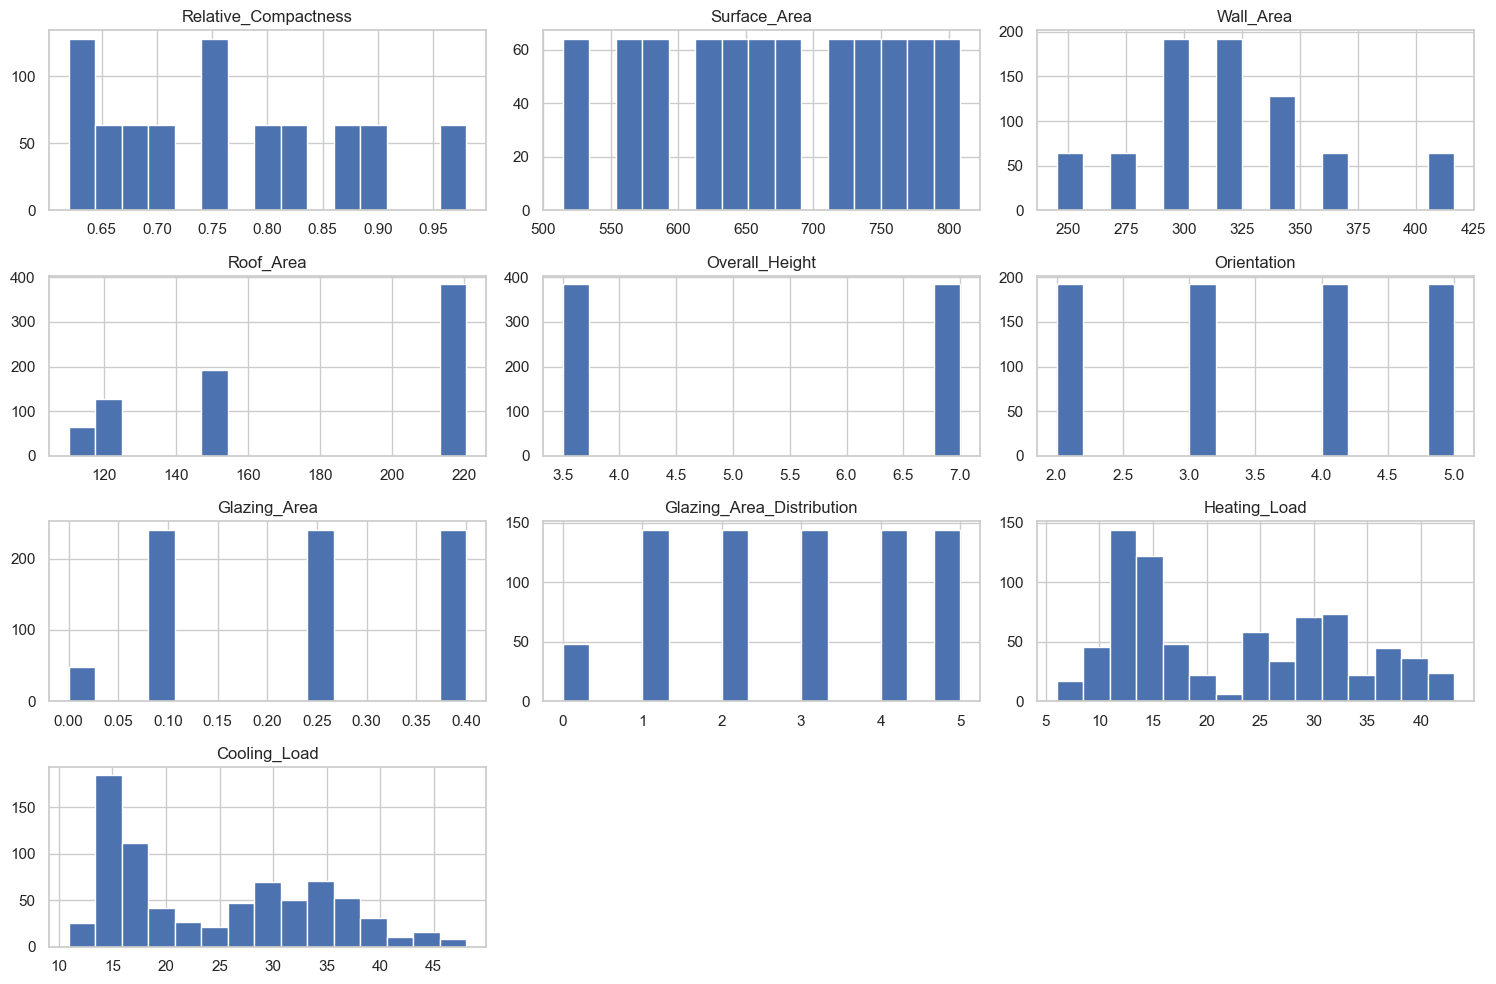

In [7]:
# Histograms for each feature
df.hist(bins=15, figsize=(15,10), layout=(4,3))
plt.tight_layout()
plt.show()

In [8]:
# Pairplot for selected features
sns.pairplot(df[['X1', 'X2', 'X3', 'Y1', 'Y2']], diag_kind='kde')
plt.show()  

KeyError: "None of [Index(['X1', 'X2', 'X3', 'Y1', 'Y2'], dtype='object')] are in the [columns]"

In [9]:
# Detect outliers using Z-score or IQR (example using IQR)
from scipy import stats

# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
is_outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Remove outliers
df_clean = df[~is_outlier.any(axis=1)]
print(f"Dataset shape after outlier removal: {df_clean.shape}")

Dataset shape after outlier removal: (768, 10)


In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Features to scale (all except Y1, Y2)
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']

# Apply scaling
df_clean[features] = scaler.fit_transform(df_clean[features])


In [11]:
# Binning Heating Load (Y1)
df_clean['Heating_Load_Class'] = pd.qcut(df_clean['Heating_Load'], q=3, labels=['Low', 'Medium', 'High'])

# Binning Cooling Load (Y2)
df_clean['Cooling_Load_Class'] = pd.qcut(df_clean['Cooling_Load'], q=3, labels=['Low', 'Medium', 'High'])

# Display the distribution
print(df_clean['Heating_Load_Class'].value_counts())
print(df_clean['Cooling_Load_Class'].value_counts())


Heating_Load_Class
Low       257
High      256
Medium    255
Name: count, dtype: int64
Cooling_Load_Class
Low       257
High      256
Medium    255
Name: count, dtype: int64


In [12]:
# Drop the original continuous targets
df_class = df_clean.drop(['Heating_Load', 'Cooling_Load', 'Cooling_Load_Class'], axis=1)  # Keeping Heating_Load_Class as target

# Display the first few rows
df_class.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load_Class
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,Medium
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,Medium
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,Medium
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,Medium
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,Medium


In [13]:
# Encode target labels
label_encoder = LabelEncoder()
df_class['Heating_Load_Class'] = label_encoder.fit_transform(df_class['Heating_Load_Class'])

# Display the encoded classes
df_class['Heating_Load_Class'].value_counts()


Heating_Load_Class
1    257
0    256
2    255
Name: count, dtype: int64

In [38]:
# Features and target
X = df_class.drop('Heating_Load_Class', axis=1)
y = df_class['Heating_Load_Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (537, 8), Testing set: (231, 8)


In [39]:
# Define a dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [40]:
# Initialize a list to store model performance
performance = []

# Iterate through models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append results as a dictionary to the performance list
    performance.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert the performance list to a DataFrame
performance_df = pd.DataFrame(performance)

# Sort the DataFrame by Accuracy in descending order
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the performance DataFrame
performance_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.926407,0.926072,0.926407,0.925739
1,Random Forest,0.913420,0.913773,0.913420,0.912244
2,Decision Tree,0.909091,0.908799,0.909091,0.908920
3,K-Nearest Neighbors,0.861472,0.863604,0.861472,0.862027
4,Support Vector Machine,0.848485,0.846461,0.848485,0.845882
5,Logistic Regression,0.826840,0.825352,0.826840,0.822124


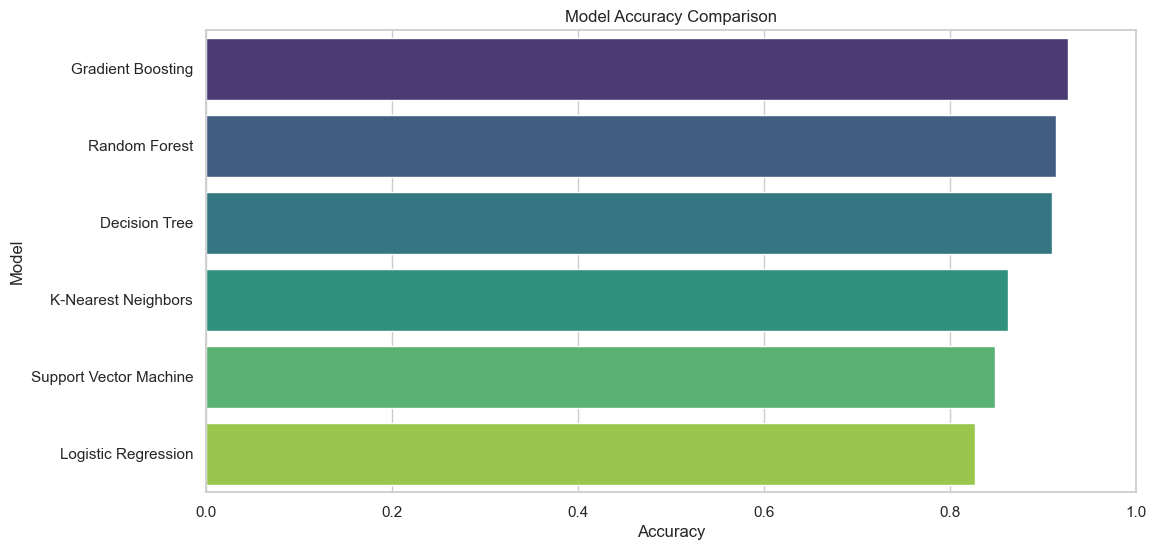

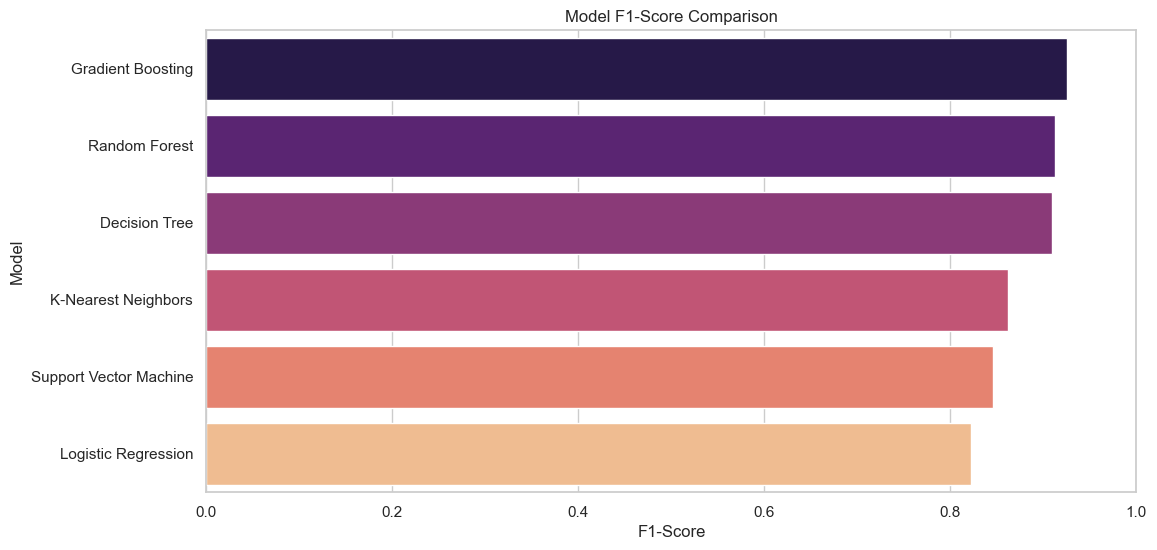

In [41]:
# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# Plot F1-Score
plt.figure(figsize=(12, 6))
sns.barplot(x='F1-Score', y='Model', data=performance_df, palette='magma')
plt.title('Model F1-Score Comparison')
plt.xlabel('F1-Score')
plt.ylabel('Model')
plt.xlim(0, 1)  # F1-Score ranges from 0 to 1
plt.show()

### Classification Report for Gradient Boosting ###

              precision    recall  f1-score   support

         Low       0.94      0.97      0.96        77
      Medium       0.92      0.95      0.94        77
        High       0.92      0.86      0.89        77

    accuracy                           0.93       231
   macro avg       0.93      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231



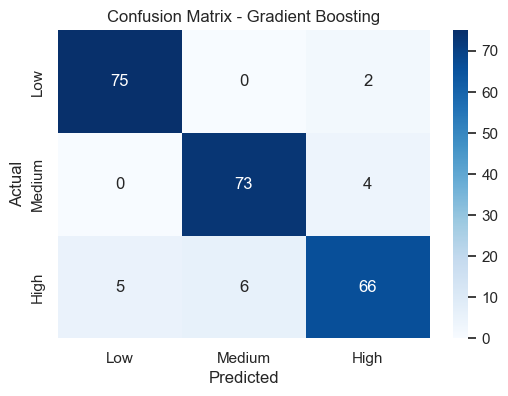

In [42]:
# Select the best model based on Accuracy
best_model_name = performance_df.iloc[0]['Model']
best_model = models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Generate Classification Report
print(f"### Classification Report for {best_model_name} ###\n")
print(classification_report(y_test, y_pred_best, target_names=['Low', 'Medium', 'High']))

# Generate Confusion Matrix
plt.figure(figsize=(6,4))
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV for Gradient Boosting
grid_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1_weighted'
)

# Fit GridSearchCV to the training data
grid_gb.fit(X_train, y_train)

# Display best parameters and best score
print(f"Best Parameters: {grid_gb.best_params_}")
print(f"Best Cross-Validation F1-Score: {grid_gb.best_score_:.4f}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation F1-Score: 0.9647


### Classification Report for Tuned Gradient Boosting ###

              precision    recall  f1-score   support

         Low       0.95      0.96      0.95        77
      Medium       0.92      0.95      0.94        77
        High       0.91      0.87      0.89        77

    accuracy                           0.93       231
   macro avg       0.93      0.93      0.93       231
weighted avg       0.93      0.93      0.93       231



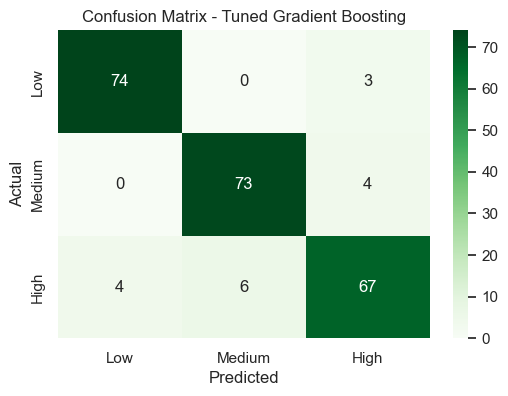

,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.926407,0.926072,0.926407,0.925739
1,Tuned Gradient Boosting,0.926407,0.926058,0.926407,0.926051
2,Random Forest,0.913420,0.913773,0.913420,0.912244
3,Decision Tree,0.909091,0.908799,0.909091,0.908920
4,K-Nearest Neighbors,0.861472,0.863604,0.861472,0.862027
5,Support Vector Machine,0.848485,0.846461,0.848485,0.845882
6,Logistic Regression,0.826840,0.825352,0.826840,0.822124


In [44]:
# Retrieve the best estimator from GridSearchCV
tuned_gb = grid_gb.best_estimator_

# Make predictions with the tuned model
y_pred_tuned = tuned_gb.predict(X_test)

# Generate Classification Report for Tuned Model
print(f"### Classification Report for Tuned {best_model_name} ###\n")
print(classification_report(y_test, y_pred_tuned, target_names=['Low', 'Medium', 'High']))

# Generate Confusion Matrix for Tuned Model
plt.figure(figsize=(6,4))
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.show()

# Update Performance DataFrame with Tuned Model
performance_tuned = {
    'Model': f'Tuned {best_model_name}',
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned, average='weighted'),
    'Recall': recall_score(y_test, y_pred_tuned, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_tuned, average='weighted')
}

# Append to the performance list and create a new DataFrame
performance.append(performance_tuned)
performance_df = pd.DataFrame(performance)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
performance_df

In [47]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned model
cv_scores = cross_val_score(tuned_gb, X, y, cv=7, scoring='f1_weighted')

print(f"### Cross-Validation F1-Scores for Tuned {best_model_name} ###")
print(cv_scores)
print(f"Mean CV F1-Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV F1-Scores: {cv_scores.std():.4f}")


### Cross-Validation F1-Scores for Tuned Gradient Boosting ###
[0.83956362 0.85665484 0.90874811 0.83836148 0.84554916 0.81489933
 0.56145848]
Mean CV F1-Score: 0.8093
Standard Deviation of CV F1-Scores: 0.1047


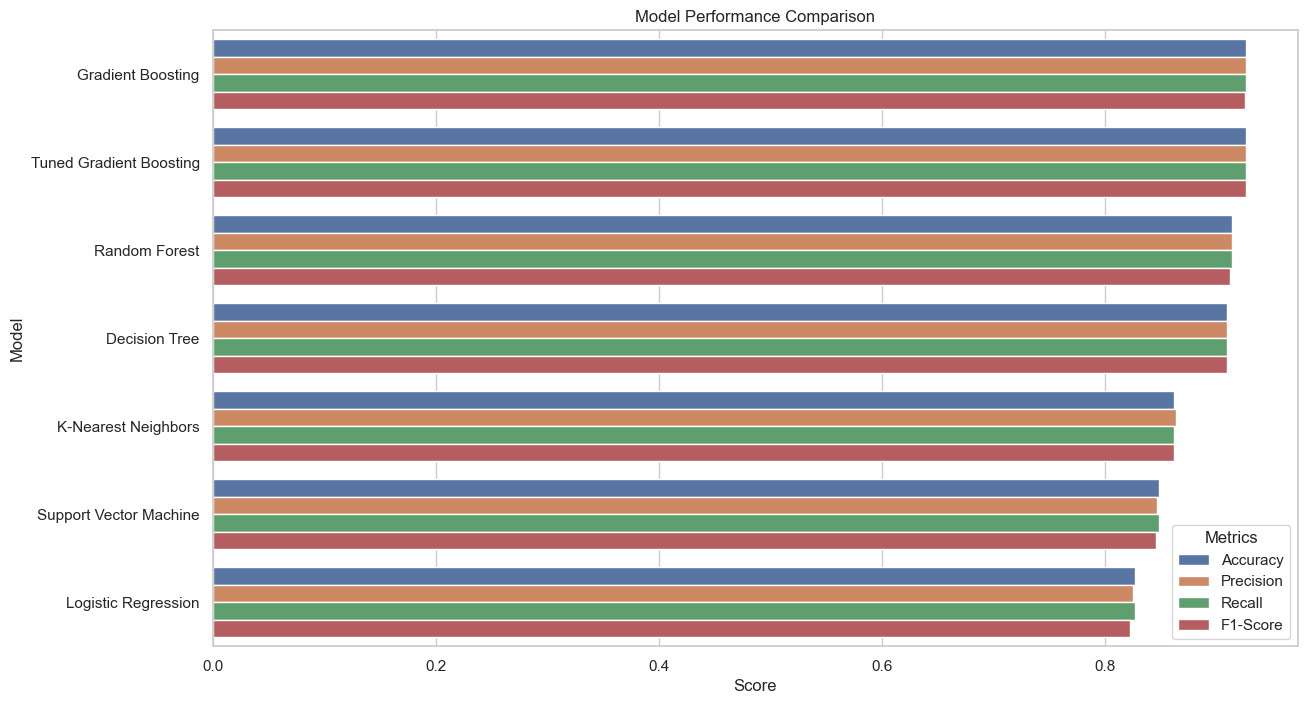

In [48]:
# Melt the DataFrame for easier plotting
performance_melted = performance_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                        var_name='Metric', value_name='Score')

# Plot the performance metrics
plt.figure(figsize=(14,8))
sns.barplot(x='Score', y='Model', hue='Metric', data=performance_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metrics')
plt.show()
